In [8]:
# import the necessary packages
import numpy as np
import cv2
import os



In [9]:
def face_detction(Frame):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    img = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    # Initialize face_crop
    face_crop = None

    # Crop faces and save them
    for i, (x, y, w, h) in enumerate(faces):
        # Crop the face from the original image
        face_crop = img[y:y+h, x:x+w]
        break  # Break the loop after the first face is detected

    return face_crop


In [10]:
import os
import glob

def load_face_dateset(dataset_path):
    dir = os.listdir(dataset_path)
    real_img_data = os.listdir(os.path.join(dataset_path, dir[0]))

    Faces = []
    Labels = []

    for sub_dir in real_img_data:
        real_img_files = glob.glob(os.path.join(dataset_path, dir[1], sub_dir) + "/*.jpg")
        for image_path in real_img_files:
            image_e = cv2.imread(image_path)
            face_crop = face_detction(image_e)
            if face_crop is not None:  # Check if a face is detected
                face_crop = cv2.resize(face_crop, (400, 400))
                Faces.append(face_crop)
                Labels.append(1)
                cv2.imshow("frame", face_crop)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cv2.destroyAllWindows()

    Faces = np.array(Faces)
    Labels = np.array(Labels)

    return Faces, Labels

    



In [15]:
faces , labesl = load_face_dateset(r"C:\Users\rohin\Desktop\New folder (2)\biomet_pattern_and_people_detection\Task 2 DeepFakes Detection-20240228\Task_1\Task_1\development")

In [12]:

pcaFaces = np.array([f.flatten() for f in faces])
print(pcaFaces)

pcaFaces.shape

[]


(0,)

[INFO] creating eigenfaces...
[INFO] computing eigenfaces took 38.6513 seconds


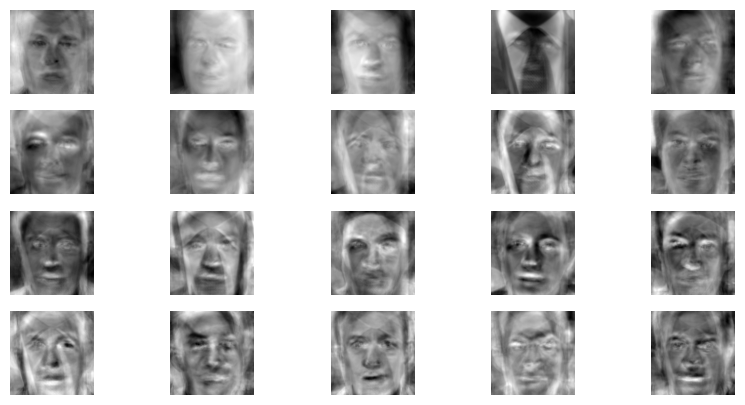

In [6]:
from sklearn.decomposition import PCA
import time
import matplotlib.pyplot as plt
import numpy as np

print("[INFO] creating eigenfaces...")
pca = PCA(
    svd_solver="randomized",
    n_components=372,  # Adjust the number of components as needed for clarity
    whiten=True
)
start = time.time()
trainX = pca.fit_transform(pcaFaces)
end = time.time()
print("[INFO] computing eigenfaces took {:.4f} seconds".format(
    end - start))

# Visualize the eigenfaces
eigenfaces = pca.components_.reshape((372, 400, 400))  # Assuming 100 components
cv2.imshow("eigen", eigenfaces[0])
cv2.waitKey(0)
plt.figure(figsize=(10, 5))
for i in range(20):  # Visualize first 10 eigenfaces
    plt.subplot(4, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
# Save eigenfaces
output_folder = "eigenfaces/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i in range(372):  # Save first 20 eigenfaces
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')
    plt.savefig(output_folder + f"eigenface_{i}.png", bbox_inches='tight', pad_inches=0)
    plt.close()

print("Eigenfaces saved successfully.")

Eigenfaces saved successfully.
